### Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from datetime import date
from datetime import datetime
today = date.today()

# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

### Data Quality

In [3]:
df = pd.read_excel('Integra Employee Sample Data.xlsx')
df.head()

,EEID,Full Name,Job Title,Department,Employee Group,Gender,Marital Status,Education,Age,Hire Date,Annual Salary,Daily Rate,Hourly Rate,Bonus %,Salary Hike %,Country,City,Distance Fom Home (km),Travel,Satisfaction,Separation Type,Exit Date
0,E02813,Kai Chow,Engineering Manager,Engineering,Technology,Male,Married,Graduate,42,2015-04-12,2015000,7750.00,968.75,0.09,0.03,Philippines,Manila,20,Non_Travel,4,Voluntary,2015-11-27
1,E04332,Luke Martin,Associate I,Operations,Call Center,Male,Single,Undergraduate,24,2015-05-16,338000,1300.00,162.50,0.05,0.04,Philippines,Manila,25,Non_Travel,4,Voluntary,2015-12-10
2,E01052,Jaxson Dinh,Associate I,Operations,Shared Services,Male,Married,Graduate,25,2015-05-03,416000,1600.00,200.00,0.09,0.03,Philippines,Davao,18,Non_Travel,5,Voluntary,2016-05-26
3,E03863,Madeline Watson,Supervisor,Operations,Call Center,Female,Solo Parent,Graduate,36,2015-05-27,624000,2400.00,300.00,0.07,0.04,Philippines,Davao,1,Non_Travel,5,Voluntary,2016-06-18
4,E01591,Paisley Trinh,Associate I,Operations,Call Center,Female,Single,Graduate,23,2015-05-04,322400,1240.00,155.00,0.07,0.04,Philippines,Davao,11,Non_Travel,4,Voluntary,2016-09-04


In [4]:
df.shape

(1000, 22)

In [5]:
df.columns

Index(['EEID', 'Full Name', 'Job Title', 'Department', 'Employee Group',
       'Gender', 'Marital Status', 'Education', 'Age', 'Hire Date',
       'Annual Salary', 'Daily Rate', 'Hourly Rate', 'Bonus %',
       'Salary Hike %', 'Country', 'City', 'Distance Fom Home (km)', 'Travel',
       'Satisfaction', 'Separation Type', 'Exit Date'],
      dtype='object')

In [6]:
df.dtypes

EEID                              object
Full Name                         object
Job Title                         object
Department                        object
Employee Group                    object
Gender                            object
Marital Status                    object
Education                         object
Age                                int64
Hire Date                 datetime64[ns]
Annual Salary                      int64
Daily Rate                       float64
Hourly Rate                      float64
Bonus %                          float64
Salary Hike %                    float64
Country                           object
City                              object
Distance Fom Home (km)             int64
Travel                            object
Satisfaction                       int64
Separation Type                   object
Exit Date                 datetime64[ns]
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   EEID                    1000 non-null   object        
 1   Full Name               1000 non-null   object        
 2   Job Title               1000 non-null   object        
 3   Department              1000 non-null   object        
 4   Employee Group          1000 non-null   object        
 5   Gender                  1000 non-null   object        
 6   Marital Status          1000 non-null   object        
 7   Education               1000 non-null   object        
 8   Age                     1000 non-null   int64         
 9   Hire Date               1000 non-null   datetime64[ns]
 10  Annual Salary           1000 non-null   int64         
 11  Daily Rate              1000 non-null   float64       
 12  Hourly Rate             1000 non-null   float64  

In [8]:
df.isnull().sum()

EEID                        0
Full Name                   0
Job Title                   0
Department                  0
Employee Group              0
Gender                      0
Marital Status              0
Education                   0
Age                         0
Hire Date                   0
Annual Salary               0
Daily Rate                  0
Hourly Rate                 0
Bonus %                     0
Salary Hike %               0
Country                     0
City                        0
Distance Fom Home (km)      0
Travel                      0
Satisfaction                0
Separation Type           651
Exit Date                 651
dtype: int64

In [9]:
for cols in df.columns:
    print('-----------------------')
    print(cols)
    print(df[cols].value_counts())

-----------------------
EEID
E00276    3
E03349    3
E04972    3
E00717    3
E03694    3
E01499    3
E01639    2
E00013    2
E00671    2
E00145    2
E02613    2
E00568    2
E02166    2
E00085    2
E03583    2
E00647    2
E04095    2
E01883    2
E02563    2
E00972    2
E00306    2
E00287    2
E00446    2
E00672    2
E02391    2
E03890    2
E04131    2
E04035    2
E00555    2
E00691    2
E00836    2
E01090    2
E03354    2
E01638    2
E01584    2
E02938    2
E02534    2
E01870    2
E02770    2
E02848    2
E01194    2
E03849    2
E00170    2
E04415    2
E03305    2
E03268    2
E04732    2
E01286    2
E04359    2
E02024    2
E01132    2
E03750    2
E01807    2
E03278    2
E01388    2
E00440    2
E03720    2
E04562    2
E02857    2
E03830    2
E02185    2
E02492    2
E03824    2
E00245    2
E00431    2
E03247    2
E02769    2
E04332    2
E02639    2
E00758    2
E01895    2
E01525    2
E00952    2
E00530    2
E02706    2
E03058    2
E01249    2
E00436    2
E01052    2
E01488    2
E03807    2

In [10]:
df.describe()

,Age,Annual Salary,Daily Rate,Hourly Rate,Bonus %,Salary Hike %,Distance Fom Home (km),Satisfaction
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,26.52,559557.40,2152.14,269.02,0.08,0.04,13.00,3.81
std,4.64,560292.05,2154.97,269.37,0.02,0.01,7.27,0.83
min,19.00,299000.00,1150.00,143.75,0.04,0.03,1.00,2.00
25%,24.00,318500.00,1225.00,153.12,0.07,0.04,7.00,3.00
50%,25.00,364000.00,1400.00,175.00,0.08,0.04,13.00,4.00
75%,28.00,494000.00,1900.00,237.50,0.09,0.04,19.00,4.00
max,42.00,3744000.00,14400.00,1800.00,0.12,0.05,25.00,5.00


In [11]:
df.describe(include='all')

,EEID,Full Name,Job Title,Department,Employee Group,Gender,Marital Status,Education,Age,Hire Date,Annual Salary,Daily Rate,Hourly Rate,Bonus %,Salary Hike %,Country,City,Distance Fom Home (km),Travel,Satisfaction,Separation Type,Exit Date
count,1000,1000,1000,1000,1000,1000,1000,1000,1000.00,1000,1000.00,1000.00,1000.00,1000.00,1000.00,1000,1000,1000.00,1000,1000.00,349,349
unique,911,991,23,5,4,2,4,3,NaN,838,NaN,NaN,NaN,NaN,NaN,1,3,NaN,3,NaN,3,321
top,E00276,Everly Walker,Associate I,Operations,Call Center,Female,Single,Graduate,NaN,2017-10-20 00:00:00,NaN,NaN,NaN,NaN,NaN,Philippines,Manila,NaN,Non_Travel,NaN,Involuntary,2021-09-22 00:00:00
freq,3,2,609,803,659,518,671,781,NaN,6,NaN,NaN,NaN,NaN,NaN,1000,606,NaN,874,NaN,243,3
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-27 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-13 00:00:00
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.52,NaN,559557.40,2152.14,269.02,0.08,0.04,NaN,NaN,13.00,NaN,3.81,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.64,NaN,560292.05,2154.97,269.37,0.02,0.01,NaN,NaN,7.27,NaN,0.83,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,NaN,299000.00,1150.00,143.75,0.04,0.03,NaN,NaN,1.00,NaN,2.00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.00,NaN,318500.00,1225.00,153.12,0.07,0.04,NaN,NaN,7.00,NaN,3.00,NaN,NaN


### Data Correlation

In [12]:
df.corr().style.background_gradient(cmap='Reds')

,Age,Annual Salary,Daily Rate,Hourly Rate,Bonus %,Salary Hike %,Distance Fom Home (km),Satisfaction
Age,1.000000,0.642153,0.642153,0.642153,0.061691,-0.025139,0.003736,0.081638
Annual Salary,0.642153,1.000000,1.000000,1.000000,0.094049,0.003735,0.023166,0.091631
Daily Rate,0.642153,1.000000,1.000000,1.000000,0.094049,0.003735,0.023166,0.091631
Hourly Rate,0.642153,1.000000,1.000000,1.000000,0.094049,0.003735,0.023166,0.091631
Bonus %,0.061691,0.094049,0.094049,0.094049,1.000000,0.111224,0.024242,0.035451
Salary Hike %,-0.025139,0.003735,0.003735,0.003735,0.111224,1.000000,-0.015464,0.003918
Distance Fom Home (km),0.003736,0.023166,0.023166,0.023166,0.024242,-0.015464,1.000000,-0.002751
Satisfaction,0.081638,0.091631,0.091631,0.091631,0.035451,0.003918,-0.002751,1.000000


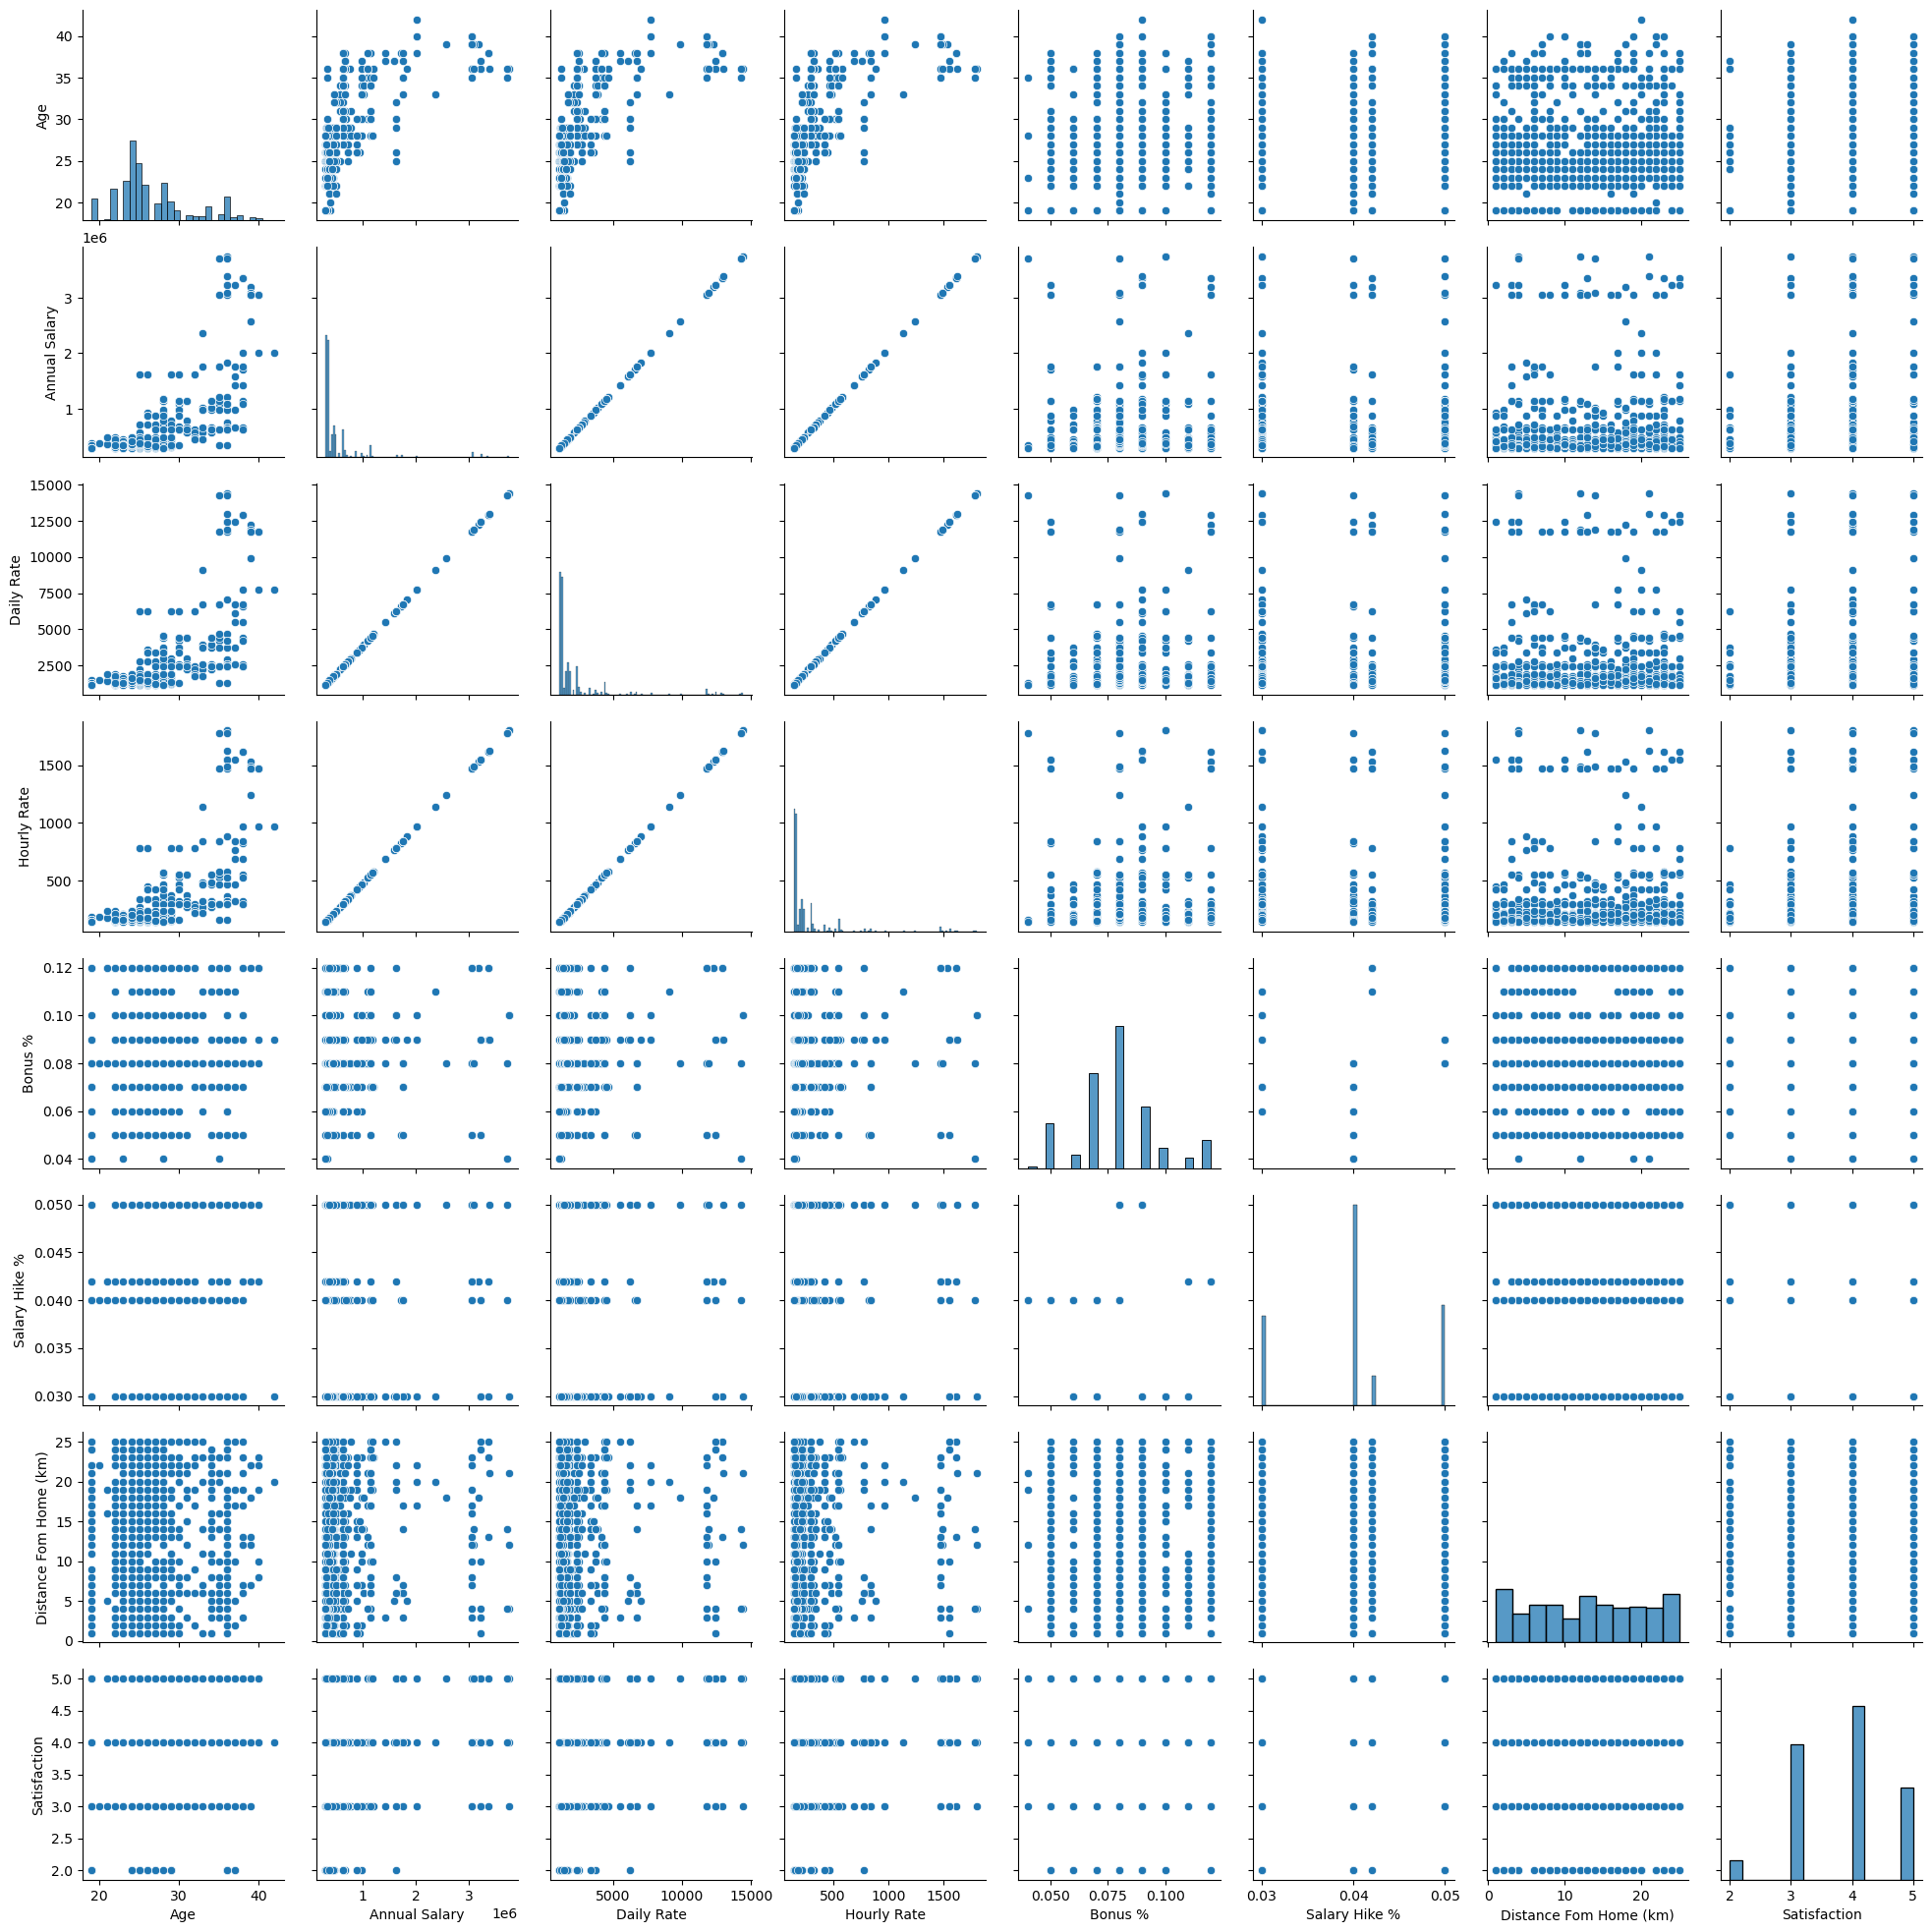

In [13]:
sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='Annual Salary'>

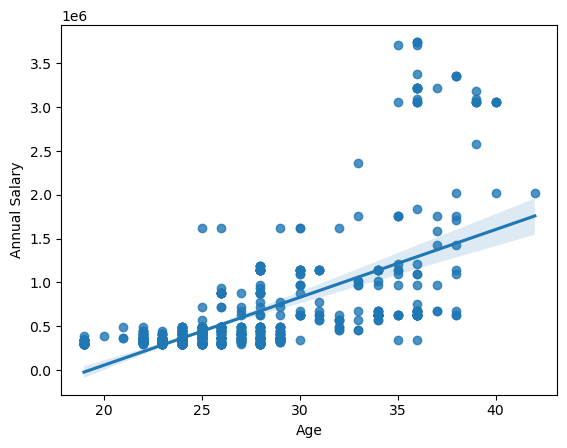

In [14]:
# Age vs Annual Salary
sns.regplot(x=df['Age'], y=df['Annual Salary'])

<AxesSubplot:xlabel='Age', ylabel='Daily Rate'>

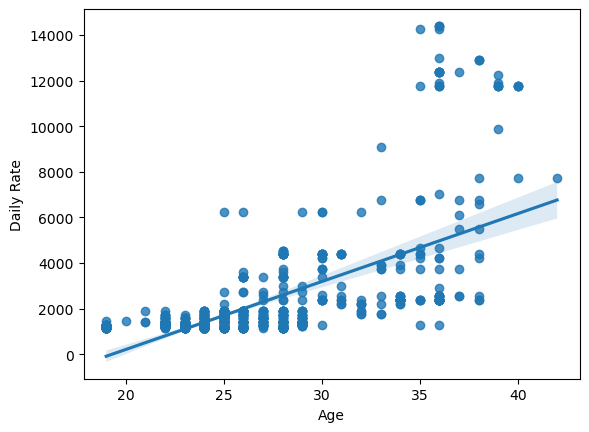

In [15]:
# Age vs Daily Rate
sns.regplot(x=df['Age'], y=df['Daily Rate'])

<AxesSubplot:xlabel='Age', ylabel='Hourly Rate'>

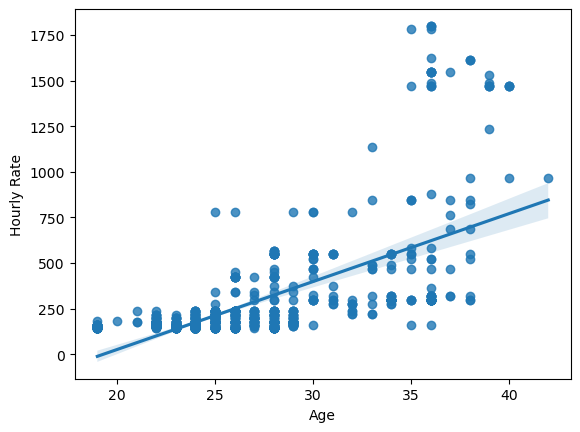

In [16]:
# Age vs Hourly Rate
sns.regplot(x=df['Age'], y=df['Hourly Rate'])

<AxesSubplot:xlabel='Annual Salary', ylabel='Daily Rate'>

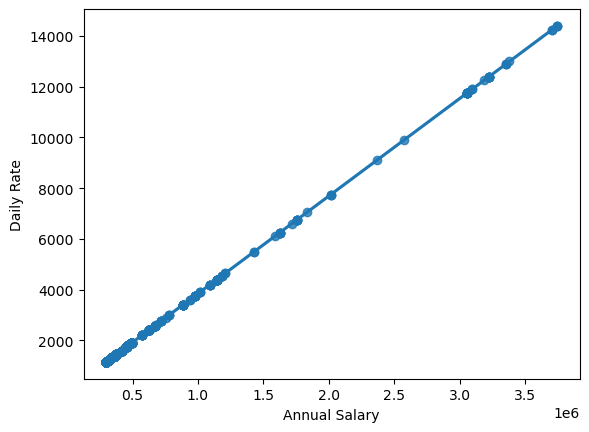

In [17]:
# Annual Salary vs Daily Rate
sns.regplot(x=df['Annual Salary'], y=df['Daily Rate'])

<AxesSubplot:>

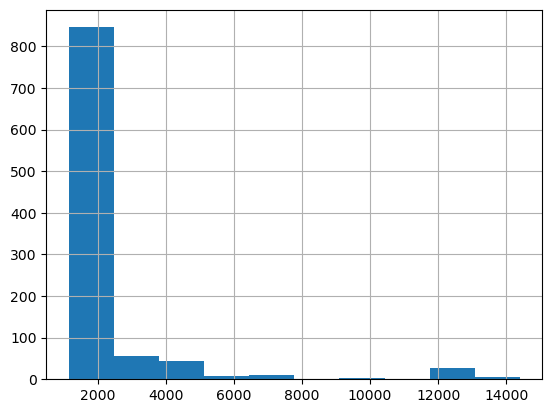

In [18]:
df['Daily Rate'].hist()

### Univariate

<AxesSubplot:xlabel='count', ylabel='Job Title'>

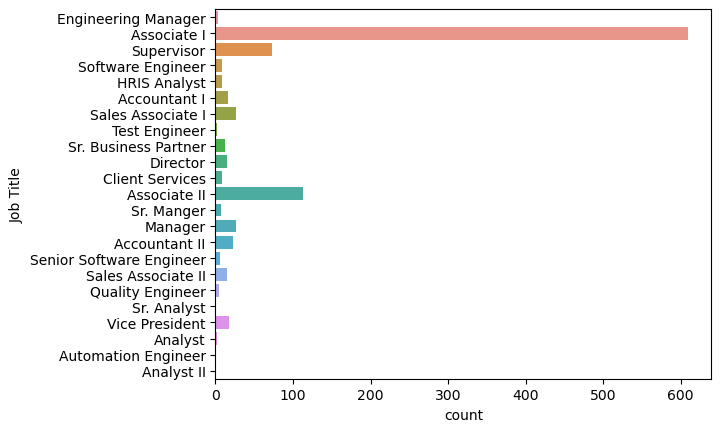

In [19]:
sns.countplot(data=df, y='Job Title')

<AxesSubplot:xlabel='count', ylabel='Department'>

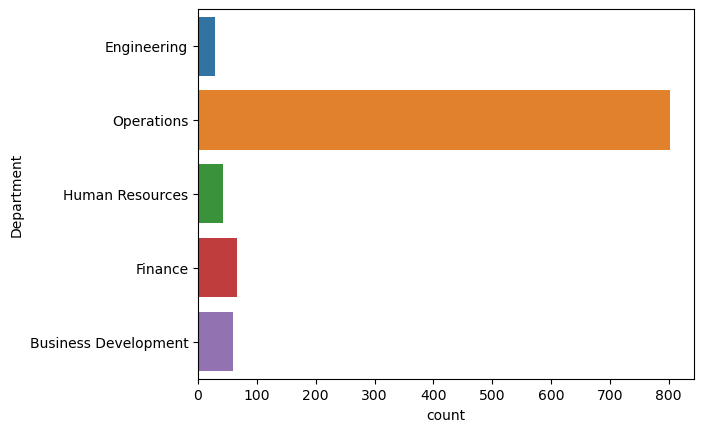

In [20]:
sns.countplot(data=df, y='Department')

In [21]:
df_department = pd.DataFrame(df['Department'].value_counts().reset_index().rename(columns={'index':'Department','Department':'count'}))
df_department

,Department,count
0,Operations,803
1,Finance,67
2,Business Development,59
3,Human Resources,42
4,Engineering,29


([<matplotlib.patches.Wedge at 0x1c28d3ea250>,
 [Text(-0.8959727462436013, 0.6381479749938092, 'Operations'),
  Text(0.5688439361247785, -0.9414969868959057, 'Finance'),
  Text(0.8878829641614185, -0.6493564829521095, 'Business Development'),
  Text(1.0461621146169688, -0.33991885787662984, 'Human Resources'),
  Text(1.0954379551905509, -0.10007840090621456, 'Engineering')],
 [Text(-0.48871240704196434, 0.3480807136329868, '80%'),
  Text(0.3102785106135155, -0.5135438110341303, '7%'),
  Text(0.484299798633501, -0.3541944452466051, '6%'),
  Text(0.5706338807001647, -0.18541028611452537, '4%'),
  Text(0.5975116119221185, -0.054588218676117024, '3%')])

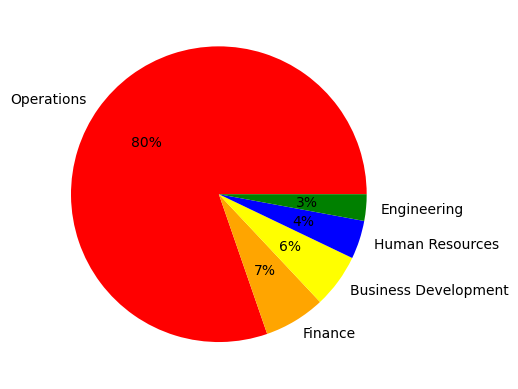

In [22]:
plt.pie(df_department['count'], labels=df_department['Department'], colors=['red','orange','yellow','blue','green'],autopct='%.0f%%')

<AxesSubplot:xlabel='Employee Group', ylabel='count'>

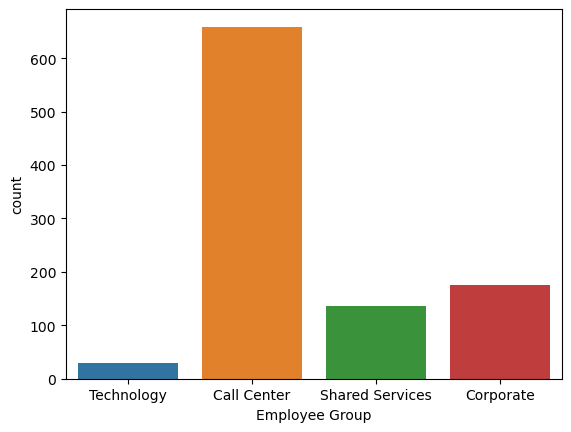

In [23]:
sns.countplot(data=df, x='Employee Group')

<AxesSubplot:xlabel='Gender', ylabel='count'>

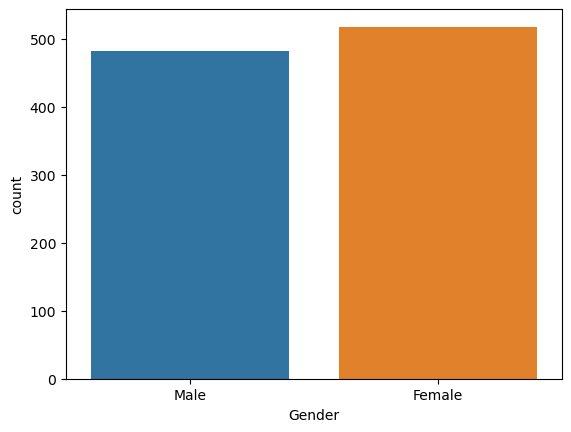

In [24]:
sns.countplot(data=df, x='Gender')

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

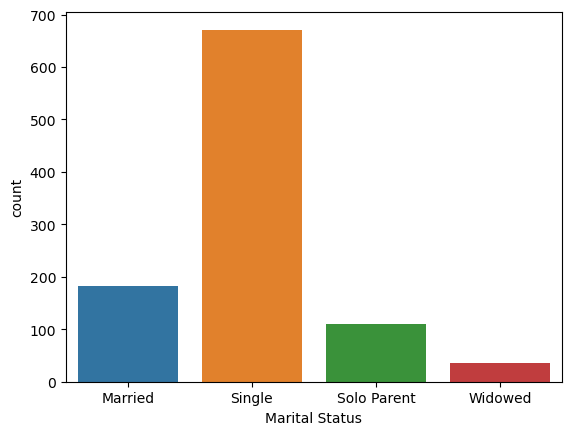

In [25]:
sns.countplot(data=df, x='Marital Status')

<AxesSubplot:xlabel='Education', ylabel='count'>

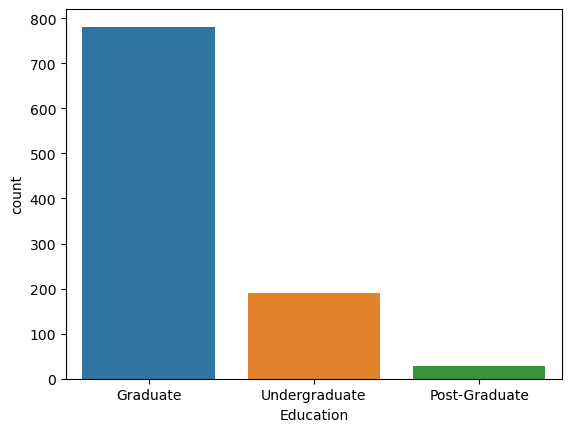

In [26]:
sns.countplot(data=df, x='Education')

<AxesSubplot:xlabel='City', ylabel='count'>

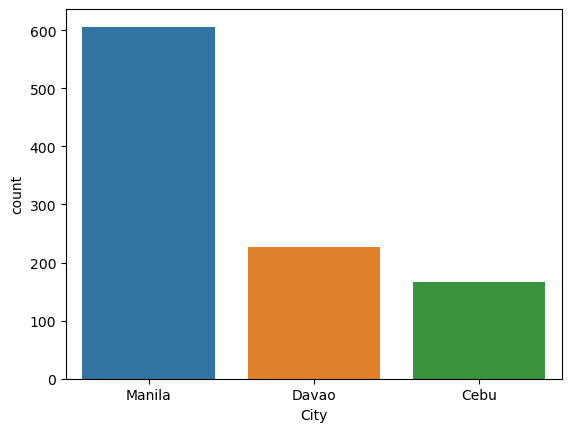

In [27]:
sns.countplot(data=df, x='City')

<AxesSubplot:xlabel='Travel', ylabel='count'>

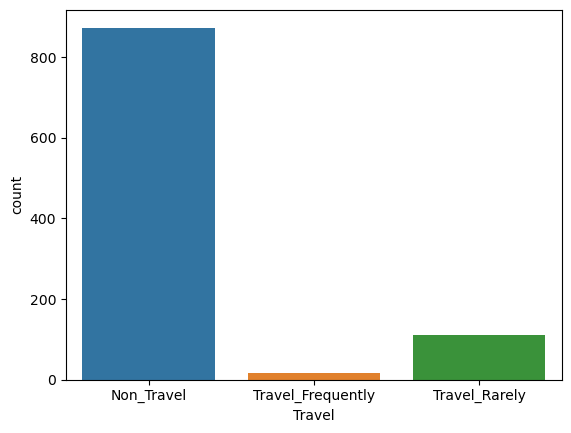

In [28]:
sns.countplot(data=df, x='Travel')

<AxesSubplot:xlabel='Satisfaction', ylabel='count'>

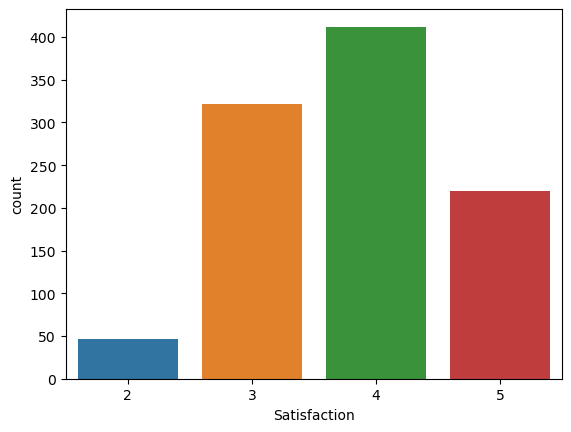

In [29]:
sns.countplot(data=df, x='Satisfaction')

<AxesSubplot:xlabel='Separation Type', ylabel='count'>

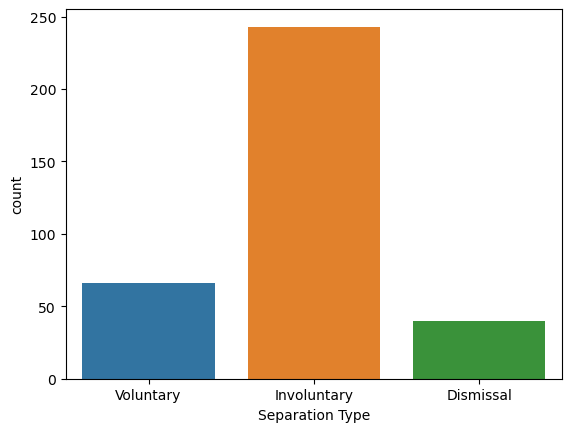

In [30]:
sns.countplot(data=df, x='Separation Type')

### Undersampling: Marital Status

In [31]:
df['Marital Status'].value_counts()

Single         671
Married        183
Solo Parent    110
Widowed         36
Name: Marital Status, dtype: int64

In [32]:
# df_undersample_single = df[df['Marital Status']=='Single'][:100].copy()
# df_undersample_not_single = df[df['Marital Status']!='Single'].copy()

# df = pd.concat([df_undersample_single, df_undersample_not_single]).reset_index(drop=True)
# df.head()

In [33]:
df['Marital Status'].value_counts()

Single         671
Married        183
Solo Parent    110
Widowed         36
Name: Marital Status, dtype: int64

### Feature Engineering

In [34]:
df['Exit Date'].fillna(' ', inplace=True)
df['Tenureship'] = df.apply(lambda x: (datetime.now() - x['Hire Date']).days  if x['Exit Date'] == ' ' else (x['Exit Date'] - x['Hire Date']).days, axis=1)
df['Tenureship'].fillna(0, inplace=True)

df_salary_grade = pd.read_excel("Salary_Grade.xlsx")
df_salary_grade.head()

## Feature Engineer: Distance Fom Home (km)

,Salary Grade,Minimum Monthly Salary,Annual
0,1,12517,150204
1,2,13305,159660
2,3,14125,169500
3,4,14993,179916
4,5,15909,190908


In [35]:
def get_salary_grade(x):
    for index, row in df_salary_grade.iterrows():
        if x >= row['Annual'] and x < df_salary_grade['Annual'][index+1]:
            return row['Salary Grade']
            break
        
df['Annual Salary Grade'] = df['Annual Salary'].apply(lambda x: get_salary_grade(x))

df['Status'] = df['Exit Date'].apply(lambda x: 'active' if x == ' ' else 'churned')
df.head()

,EEID,Full Name,Job Title,Department,Employee Group,Gender,Marital Status,Education,Age,Hire Date,Annual Salary,Daily Rate,Hourly Rate,Bonus %,Salary Hike %,Country,City,Distance Fom Home (km),Travel,Satisfaction,Separation Type,Exit Date,Tenureship,Annual Salary Grade,Status
0,E02813,Kai Chow,Engineering Manager,Engineering,Technology,Male,Married,Graduate,42,2015-04-12,2015000,7750.00,968.75,0.09,0.03,Philippines,Manila,20,Non_Travel,4,Voluntary,2015-11-27 00:00:00,229,29,churned
1,E04332,Luke Martin,Associate I,Operations,Call Center,Male,Single,Undergraduate,24,2015-05-16,338000,1300.00,162.50,0.05,0.04,Philippines,Manila,25,Non_Travel,4,Voluntary,2015-12-10 00:00:00,208,12,churned
2,E01052,Jaxson Dinh,Associate I,Operations,Shared Services,Male,Married,Graduate,25,2015-05-03,416000,1600.00,200.00,0.09,0.03,Philippines,Davao,18,Non_Travel,5,Voluntary,2016-05-26 00:00:00,389,14,churned
3,E03863,Madeline Watson,Supervisor,Operations,Call Center,Female,Solo Parent,Graduate,36,2015-05-27,624000,2400.00,300.00,0.07,0.04,Philippines,Davao,1,Non_Travel,5,Voluntary,2016-06-18 00:00:00,388,19,churned
4,E01591,Paisley Trinh,Associate I,Operations,Call Center,Female,Single,Graduate,23,2015-05-04,322400,1240.00,155.00,0.07,0.04,Philippines,Davao,11,Non_Travel,4,Voluntary,2016-09-04 00:00:00,489,11,churned


<AxesSubplot:>

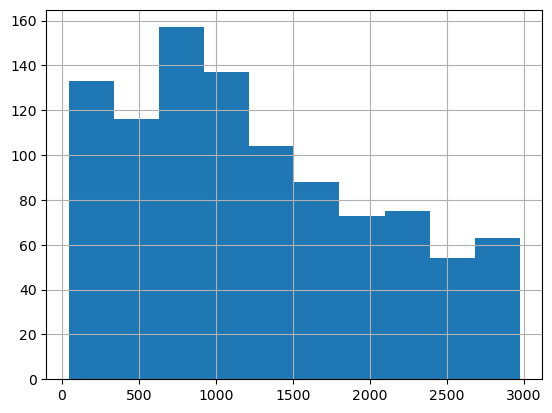

In [36]:
df['Tenureship'].hist()

<AxesSubplot:>

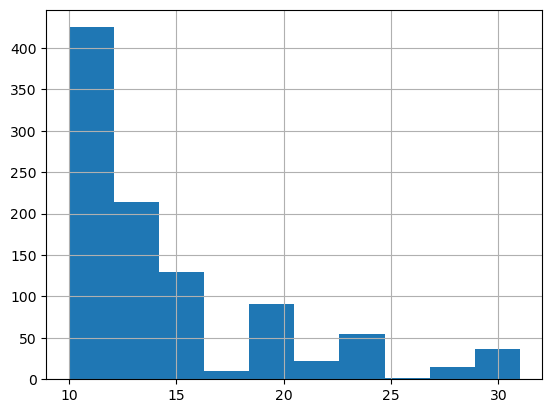

In [37]:
df['Annual Salary Grade'].hist()

<AxesSubplot:>

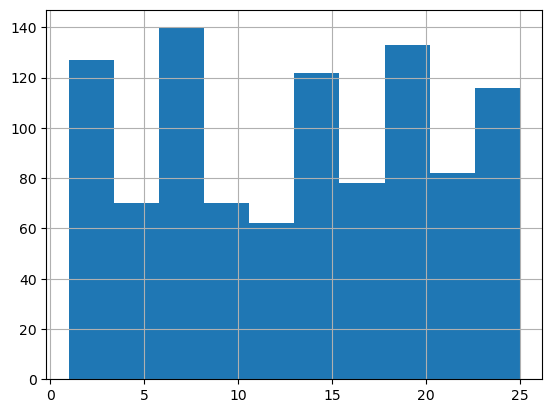

In [38]:
df['Distance Fom Home (km)'].hist()

In [39]:
df.groupby(['Status','Age'])['Status'].count()

Status   Age
active   19      48
         20       1
         21       3
         22      69
         23      85
         24     157
         25      86
         26      24
         27      28
         28      11
         29      27
         30      21
         31      10
         32       3
         34       1
         35      15
         36      50
         37       7
         38       5
churned  19       3
         22       5
         23      10
         24      33
         25      50
         26      61
         27      13
         28      78
         29      17
         30       2
         31       1
         32       7
         33      10
         34      33
         36       6
         38       7
         39       7
         40       5
         42       1
Name: Status, dtype: int64

In [40]:
def category_to_label(df_col):
    le.fit(df_col)
    df_col = le.transform(df_col)
    return df_col

df['Job Title'] = category_to_label(df['Job Title'])
df['Department'] = category_to_label(df['Department'])
df['Employee Group'] = category_to_label(df['Employee Group'])
df['Gender'] = category_to_label(df['Gender'])
df['Marital Status'] = category_to_label(df['Marital Status'])
df['Education'] = category_to_label(df['Education'])
df['Country'] = category_to_label(df['Country'])
df['City'] = category_to_label(df['City'])
df['Travel'] = category_to_label(df['Travel'])
df['Status'] = category_to_label(df['Status'])

df.head()

,EEID,Full Name,Job Title,Department,Employee Group,Gender,Marital Status,Education,Age,Hire Date,Annual Salary,Daily Rate,Hourly Rate,Bonus %,Salary Hike %,Country,City,Distance Fom Home (km),Travel,Satisfaction,Separation Type,Exit Date,Tenureship,Annual Salary Grade,Status
0,E02813,Kai Chow,9,1,3,1,0,0,42,2015-04-12,2015000,7750.00,968.75,0.09,0.03,0,2,20,0,4,Voluntary,2015-11-27 00:00:00,229,29,1
1,E04332,Luke Martin,4,4,0,1,1,2,24,2015-05-16,338000,1300.00,162.50,0.05,0.04,0,2,25,0,4,Voluntary,2015-12-10 00:00:00,208,12,1
2,E01052,Jaxson Dinh,4,4,2,1,0,0,25,2015-05-03,416000,1600.00,200.00,0.09,0.03,0,1,18,0,5,Voluntary,2016-05-26 00:00:00,389,14,1
3,E03863,Madeline Watson,20,4,0,0,2,0,36,2015-05-27,624000,2400.00,300.00,0.07,0.04,0,1,1,0,5,Voluntary,2016-06-18 00:00:00,388,19,1
4,E01591,Paisley Trinh,4,4,0,0,1,0,23,2015-05-04,322400,1240.00,155.00,0.07,0.04,0,1,11,0,4,Voluntary,2016-09-04 00:00:00,489,11,1


### Feature Selection

In [41]:
# Individual details not that important
df.drop(['EEID','Full Name','Country','Exit Date','Hire Date','Separation Type','Annual Salary','Daily Rate','Hourly Rate'],axis=1,inplace=True)
df.head()

,Job Title,Department,Employee Group,Gender,Marital Status,Education,Age,Bonus %,Salary Hike %,City,Distance Fom Home (km),Travel,Satisfaction,Tenureship,Annual Salary Grade,Status
0,9,1,3,1,0,0,42,0.09,0.03,2,20,0,4,229,29,1
1,4,4,0,1,1,2,24,0.05,0.04,2,25,0,4,208,12,1
2,4,4,2,1,0,0,25,0.09,0.03,1,18,0,5,389,14,1
3,20,4,0,0,2,0,36,0.07,0.04,1,1,0,5,388,19,1
4,4,4,0,0,1,0,23,0.07,0.04,1,11,0,4,489,11,1


In [42]:
df.corr().style.background_gradient(cmap='Reds')

,Job Title,Department,Employee Group,Gender,Marital Status,Education,Age,Bonus %,Salary Hike %,City,Distance Fom Home (km),Travel,Satisfaction,Tenureship,Annual Salary Grade,Status
Job Title,1.000000,-0.329677,0.321539,-0.005757,-0.002012,-0.107346,0.697509,-0.012888,-0.145903,-0.160715,-0.005886,0.247042,0.035289,0.016253,0.609720,0.049067
Department,-0.329677,1.000000,-0.432937,0.043609,0.186207,0.198483,-0.383024,-0.056615,-0.102793,0.047906,-0.050419,-0.157660,-0.080515,0.076262,-0.560942,-0.156343
Employee Group,0.321539,-0.432937,1.000000,0.009916,-0.002659,-0.270551,0.302354,0.051870,-0.008786,-0.163579,0.055824,0.147410,0.039437,-0.053289,0.469068,0.058607
Gender,-0.005757,0.043609,0.009916,1.000000,0.025678,0.027569,-0.017106,-0.014976,0.041096,-0.014707,-0.024791,-0.011868,0.016829,0.046389,-0.012596,0.007482
Marital Status,-0.002012,0.186207,-0.002659,0.025678,1.000000,0.035318,-0.032745,-0.063137,-0.150758,-0.011043,-0.008956,-0.181146,-0.153220,0.291299,-0.138987,-0.513021
Education,-0.107346,0.198483,-0.270551,0.027569,0.035318,1.000000,-0.128373,-0.161991,-0.009728,0.064013,-0.088156,-0.029113,-0.023259,0.027134,-0.135083,-0.039222
Age,0.697509,-0.383024,0.302354,-0.017106,-0.032745,-0.128373,1.000000,0.061691,-0.025139,-0.120870,0.003736,0.382627,0.081638,-0.098228,0.764552,0.254098
Bonus %,-0.012888,-0.056615,0.051870,-0.014976,-0.063137,-0.161991,0.061691,1.000000,0.111224,-0.073906,0.024242,-0.028192,0.035451,-0.022672,0.092146,0.029395
Salary Hike %,-0.145903,-0.102793,-0.008786,0.041096,-0.150758,-0.009728,-0.025139,0.111224,1.000000,-0.007011,-0.015464,0.038756,0.003918,-0.082869,0.000734,0.174624
City,-0.160715,0.047906,-0.163579,-0.014707,-0.011043,0.064013,-0.120870,-0.073906,-0.007011,1.000000,0.001649,-0.084247,-0.029050,0.053505,-0.165376,-0.119007


### Split: Train, Test, Validation 

In [43]:
df_churned = df[df['Status']==1].copy()
df_active = df[df['Status']==0].copy()

df_churned.shape, df_active.shape

((349, 16), (651, 16))

In [44]:
df_holdout = pd.concat([df_churned[:100],df_active[:100]]).reset_index(drop=True)
df_ml = pd.concat([df_churned[100:],df_active[100:]]).reset_index(drop=True)
df_holdout.shape, df_ml.shape

((200, 16), (800, 16))

In [45]:
# df_ml_0 = df_ml[df_ml['Status']==0] #df_ml.Status.value_counts()[1:][0]
# df_ml_1 = df_ml[df_ml['Status']==1][:df_ml.Status.value_counts()[1:][0]]

# df_ml_final = pd.concat([df_ml_0, df_ml_1]).reset_index(drop=True)
# df_ml_final

In [46]:
x = df_ml.drop(["Status"], axis=1)
y = df_ml["Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30, stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((560, 15), (240, 15), (560,), (240,))

In [47]:
y_train[y_train==0].shape

(386,)

### Model Training: Decision Tree

In [48]:
clf = DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=20, random_state=25)

clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=4,
                       random_state=25)

<AxesSubplot:>

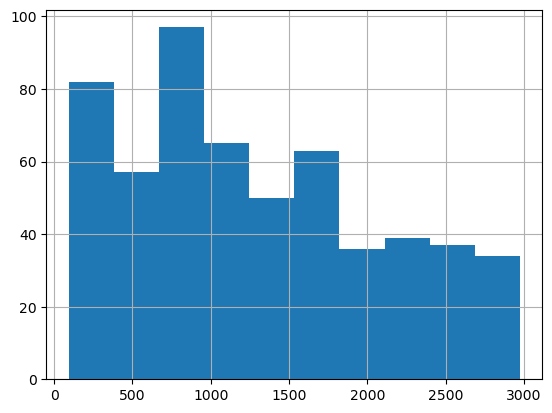

In [49]:
x_train['Tenureship'].hist()

<AxesSubplot:>

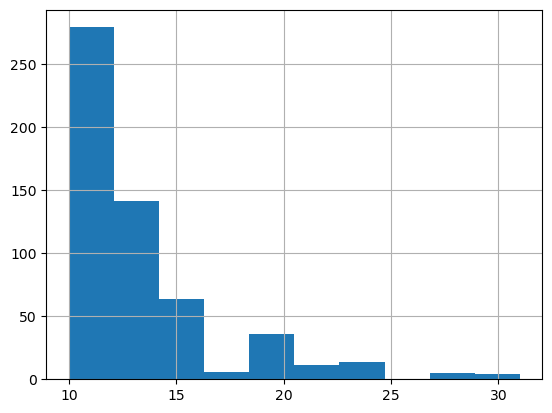

In [50]:
x_train['Annual Salary Grade'].hist()

<AxesSubplot:>

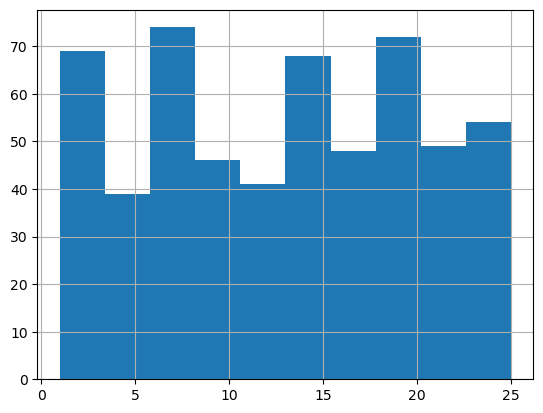

In [51]:
x_train['Distance Fom Home (km)'].hist()

### Model Validation: Decision Tree

In [52]:
y_pred = clf.predict(x_test)

#Check the performance metrics
print("{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))

93.33%


In [53]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=4,
                       random_state=25):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       165
           1       0.92      0.87      0.89        75

    accuracy                           0.93       240
   macro avg       0.93      0.92      0.92       240
weighted avg       0.93      0.93      0.93       240




In [54]:
print("Confusion Matrix: \n%s" % metrics.confusion_matrix(y_test,y_pred))

Confusion Matrix: 
[[159   6]
 [ 10  65]]


In [55]:
#Extract the feature importance
f_importance = clf.feature_importances_

#Put into a DataFrame along with Feature Names for easier understanding.
f_list = x_train.columns
df_feature_importance = pd.DataFrame(f_importance, index=f_list, columns=["Importance"])

#Sort the values in Descending order (Most Important -> Least Important)
# df_feature_importance.sort_values(["Importance"],ascending=False)

df_feature_importance.sort_values(by='Importance',ascending=False).reset_index().rename(columns={'index':'Factors'})

,Factors,Importance
0,Marital Status,0.60
1,Tenureship,0.26
2,Age,0.07
3,Job Title,0.02
4,Bonus %,0.01
5,Gender,0.01
6,Distance Fom Home (km),0.01
7,Employee Group,0.01
8,Satisfaction,0.00
9,Salary Hike %,0.00


<AxesSubplot:>

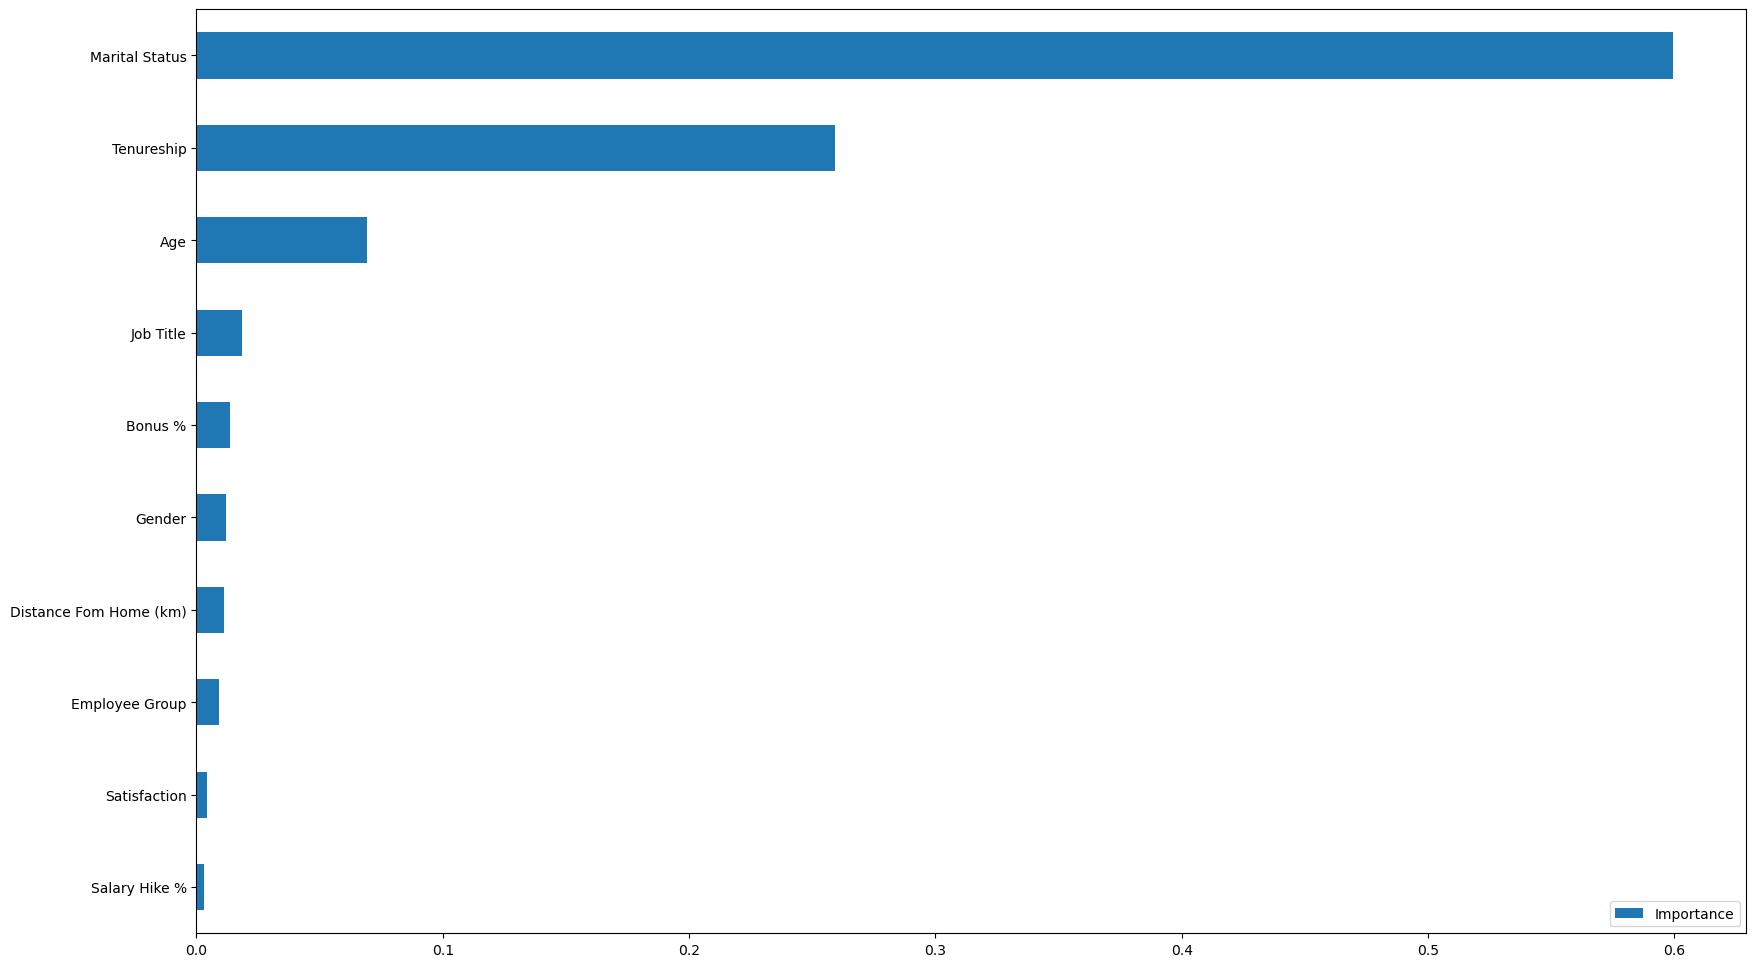

In [56]:
df_feature_importance_asc = df_feature_importance.sort_values(["Importance"], ascending = True)[-10:]

#Horizontal Bar Plot
df_feature_importance_asc.plot(kind='barh', figsize=(20,12))

In [57]:
feature_col = list(x_train.columns)

#Get classes
classes = clf.classes_

#Convert to String if number
classes = ["%s" % clas for clas in classes]

classes

['0', '1']

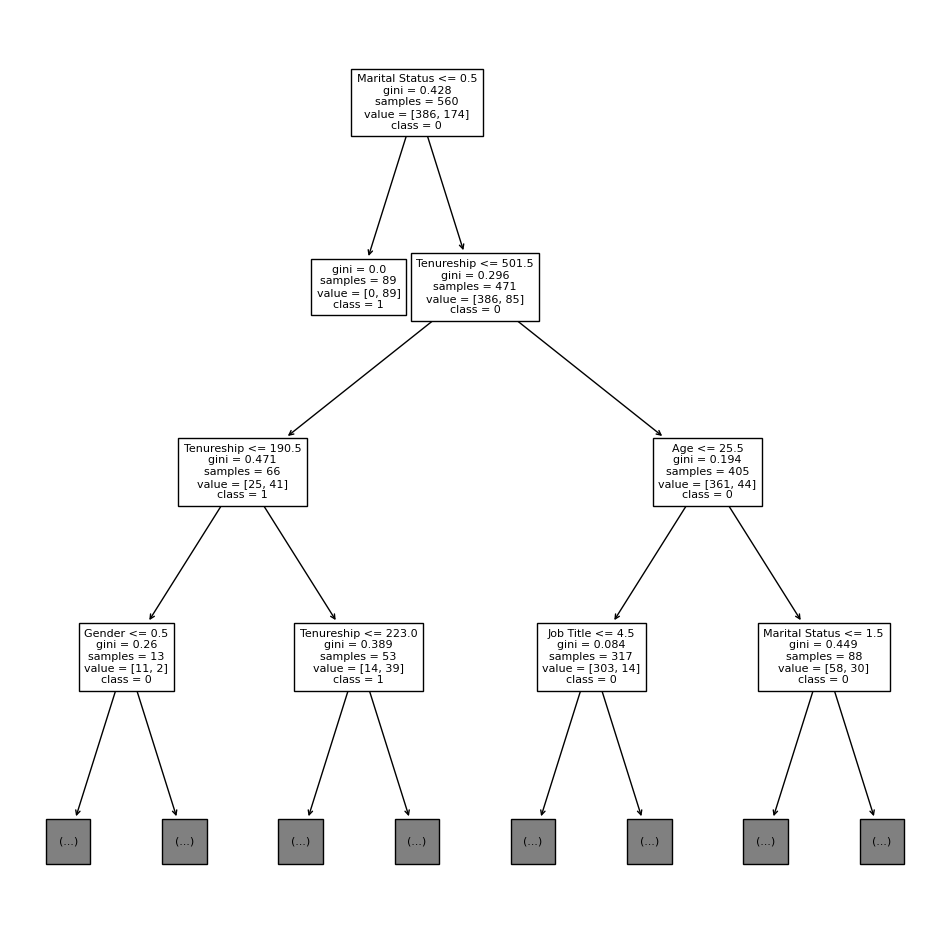

In [58]:
# set plot size (denoted in inches)
plt.figure(figsize=(12,12))  

#Use the plot tree function
plot_tree(clf, class_names=classes, feature_names=feature_col, fontsize=8, max_depth=3)

#Show the Plot
plt.show()

### Holdout Testing using Decision Tree

In [59]:
df_holdout_testing = df_holdout.drop(["Status"], axis=1)
actual = df_holdout["Status"]
predicted = clf.predict(df_holdout_testing)

In [60]:
#Check the performance metrics
print("{:.2%}".format(metrics.accuracy_score(actual,predicted)))

59.50%


In [61]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(actual, predicted)))

Classification report for classifier DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=4,
                       random_state=25):
              precision    recall  f1-score   support

           0       0.63      0.47      0.54       100
           1       0.58      0.72      0.64       100

    accuracy                           0.59       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.60      0.59      0.59       200




In [62]:
print("Confusion Matrix: \n%s" % metrics.confusion_matrix(actual,predicted))

Confusion Matrix: 
[[47 53]
 [28 72]]


In [63]:
df_holdout_testing['Actual'] = actual
df_holdout_testing['Predicted'] = predicted
df_holdout_testing

,Job Title,Department,Employee Group,Gender,Marital Status,Education,Age,Bonus %,Salary Hike %,City,Distance Fom Home (km),Travel,Satisfaction,Tenureship,Annual Salary Grade,Actual,Predicted
0,9,1,3,1,0,0,42,0.09,0.03,2,20,0,4,229,29,1,1
1,4,4,0,1,1,2,24,0.05,0.04,2,25,0,4,208,12,1,1
2,4,4,2,1,0,0,25,0.09,0.03,1,18,0,5,389,14,1,1
3,20,4,0,0,2,0,36,0.07,0.04,1,1,0,5,388,19,1,0
4,4,4,0,0,1,0,23,0.07,0.04,1,11,0,4,489,11,1,0
5,4,4,0,0,1,2,22,0.07,0.04,2,9,0,3,148,12,1,0
6,4,4,0,1,1,0,25,0.07,0.04,1,15,0,5,537,11,1,0
7,4,4,2,1,1,0,23,0.08,0.05,2,7,0,4,489,11,1,0
8,16,1,3,0,3,0,31,0.05,0.04,0,25,0,3,499,21,1,0
9,10,3,1,1,0,0,28,0.08,0.05,2,19,0,4,530,16,1,1


### Attrition Prediction using Decision Tree


In [64]:
df_active_dt = df_active.drop('Status',axis=1)
attrition_dt = clf.predict(df_active_dt)
attrition_dt

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [65]:
probablity_dt = clf.predict_proba(df_active_dt)
probablity_dt

array([[0.        , 1.        ],
       [0.42857143, 0.57142857],
       [0.        , 1.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [66]:
df_active_dt['Prediction'] = attrition_dt
df_active_dt[['Will Churn','Will Stay']] = probablity_dt
df_active_dt['Prediction'] = df_active_dt['Prediction'].apply(lambda x: 'active' if x==1 else 'churned')
df_active_dt

,Job Title,Department,Employee Group,Gender,Marital Status,Education,Age,Bonus %,Salary Hike %,City,Distance Fom Home (km),Travel,Satisfaction,Tenureship,Annual Salary Grade,Prediction,Will Churn,Will Stay
349,14,0,1,0,0,0,25,0.09,0.05,0,1,0,5,773,18,active,0.00,1.00
350,11,2,1,0,1,0,38,0.08,0.05,2,3,2,4,1263,26,active,0.43,0.57
351,20,4,0,1,1,2,38,0.08,0.05,1,21,0,4,1203,19,active,0.00,1.00
352,20,4,2,1,1,1,38,0.07,0.03,1,19,0,3,1608,19,active,0.43,0.57
353,11,2,1,0,1,0,38,0.05,0.04,2,6,2,4,671,27,active,0.43,0.57
354,11,2,1,0,1,0,38,0.05,0.04,2,7,2,3,2751,28,churned,0.80,0.20
355,20,4,0,1,1,2,37,0.11,0.03,2,2,0,5,2276,19,churned,0.80,0.20
356,11,2,1,0,1,0,37,0.09,0.03,2,25,2,3,118,26,churned,1.00,0.00
357,19,0,1,0,1,0,37,0.09,0.03,2,5,0,4,1903,27,churned,0.80,0.20
358,22,4,1,0,1,0,37,0.05,0.04,2,10,1,4,1904,30,churned,0.80,0.20


In [67]:
# staying
len(df_active_dt[df_active_dt.Prediction == 'active'])/df_active_dt.shape[0]

0.0967741935483871

In [68]:
# churn
len(df_active_dt[df_active_dt.Prediction == 'churned'])/df_active_dt.shape[0]

0.9032258064516129

### Model Training: RandomForest Classifier

In [69]:
cl_rand = RandomForestClassifier(n_estimators=100)
cl_rand.fit(x_train, y_train)

RandomForestClassifier()

### Model Validation: RandomForest Classifier

In [70]:
predict_rand = cl_rand.predict(x_test)
predict_rand

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [71]:
metrics.accuracy_score(predict_rand, y_test)*100

97.08333333333333

In [72]:
#Extract the feature importance
f_importance = cl_rand.feature_importances_

#Put into a DataFrame along with Feature Names for easier understanding.
f_list = x_train.columns
df_feature_importance_rand = pd.DataFrame(f_importance, index=f_list, columns=["Importance"])

#Sort the values in Descending order (Most Important -> Least Important)
# df_feature_importance.sort_values(["Importance"],ascending=False)

df_feature_importance_rand.sort_values(by='Importance',ascending=False).reset_index().rename(columns={'index':'Factors'})

,Factors,Importance
0,Marital Status,0.26
1,Age,0.20
2,Tenureship,0.20
3,Annual Salary Grade,0.07
4,Job Title,0.05
5,Distance Fom Home (km),0.04
6,Bonus %,0.03
7,Satisfaction,0.03
8,Salary Hike %,0.03
9,Department,0.01


<AxesSubplot:>

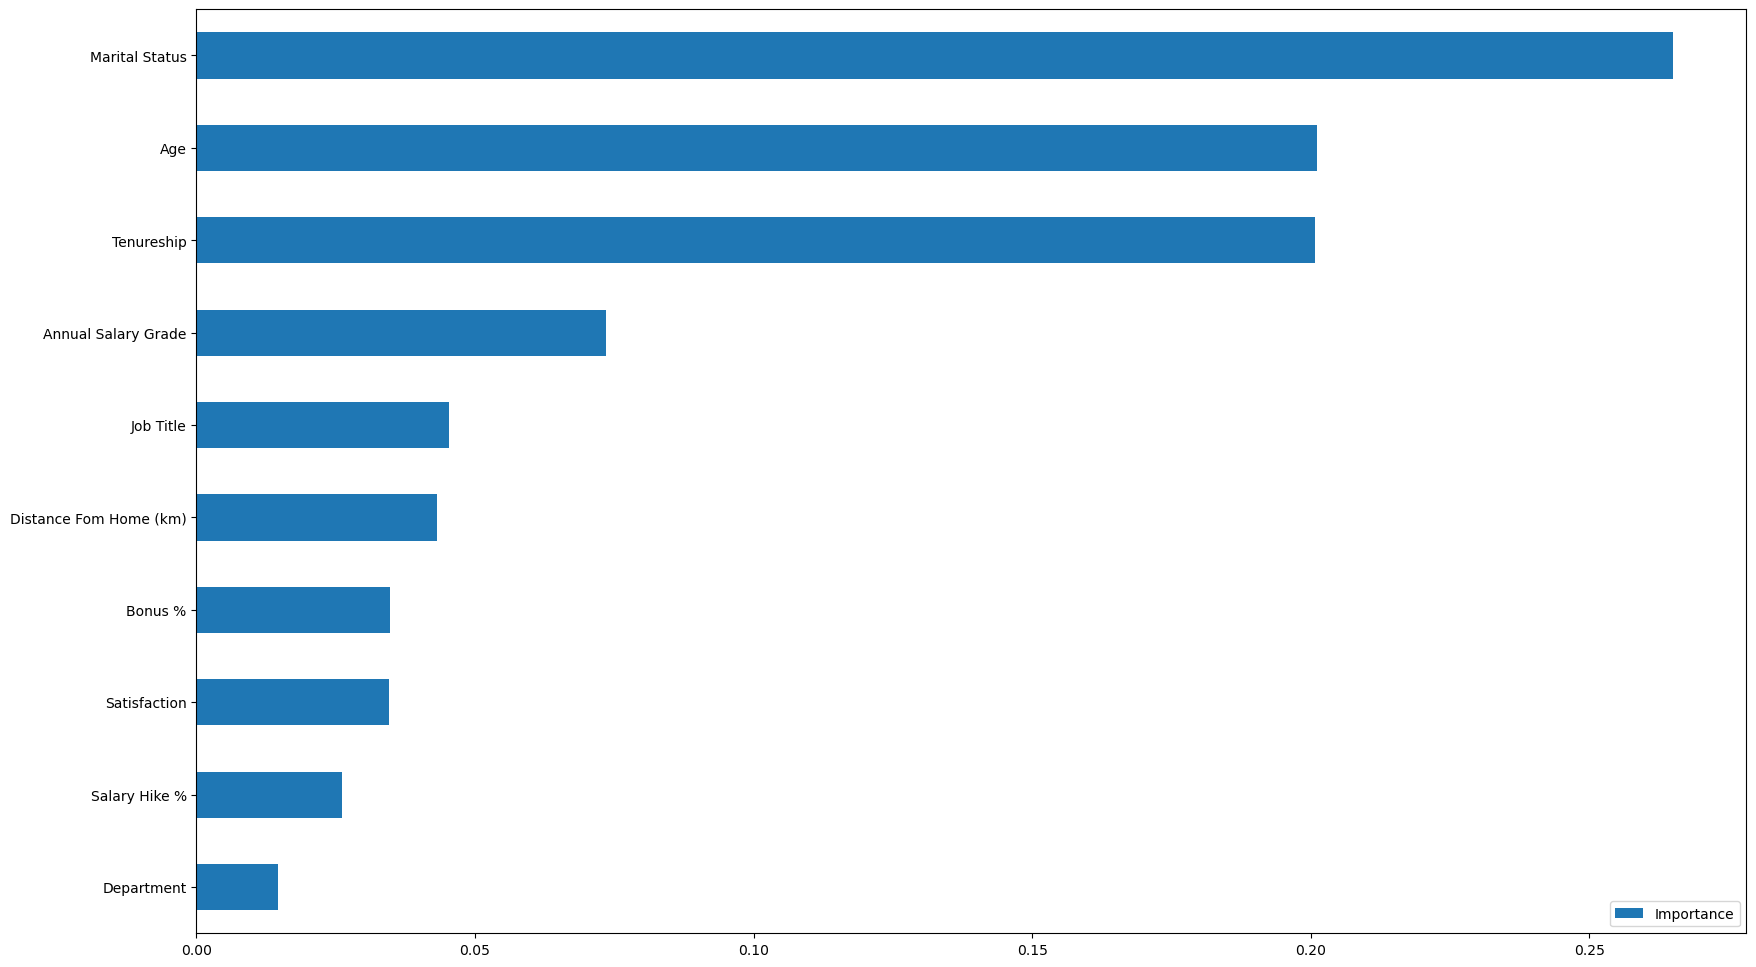

In [73]:
df_feature_importance_rand_asc = df_feature_importance_rand.sort_values(["Importance"], ascending = True)[-10:]

#Horizontal Bar Plot
df_feature_importance_rand_asc.plot(kind='barh', figsize=(20,12))

In [74]:
df_holdout_testing = df_holdout.drop(["Status"], axis=1)
actual = df_holdout["Status"]
predicted = cl_rand.predict(df_holdout_testing)

In [75]:
#Check the performance metrics
print("{:.2%}".format(metrics.accuracy_score(actual,predicted)))

58.50%


In [76]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(actual, predicted)))

Classification report for classifier DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=4,
                       random_state=25):
              precision    recall  f1-score   support

           0       0.65      0.37      0.47       100
           1       0.56      0.80      0.66       100

    accuracy                           0.58       200
   macro avg       0.60      0.58      0.56       200
weighted avg       0.60      0.58      0.56       200




### Holdout Testing using Random Forest Classifier

In [77]:
df_holdout_testing['Actual'] = actual
df_holdout_testing['Predicted'] = predicted
df_holdout_testing

,Job Title,Department,Employee Group,Gender,Marital Status,Education,Age,Bonus %,Salary Hike %,City,Distance Fom Home (km),Travel,Satisfaction,Tenureship,Annual Salary Grade,Actual,Predicted
0,9,1,3,1,0,0,42,0.09,0.03,2,20,0,4,229,29,1,1
1,4,4,0,1,1,2,24,0.05,0.04,2,25,0,4,208,12,1,0
2,4,4,2,1,0,0,25,0.09,0.03,1,18,0,5,389,14,1,1
3,20,4,0,0,2,0,36,0.07,0.04,1,1,0,5,388,19,1,1
4,4,4,0,0,1,0,23,0.07,0.04,1,11,0,4,489,11,1,0
5,4,4,0,0,1,2,22,0.07,0.04,2,9,0,3,148,12,1,0
6,4,4,0,1,1,0,25,0.07,0.04,1,15,0,5,537,11,1,0
7,4,4,2,1,1,0,23,0.08,0.05,2,7,0,4,489,11,1,0
8,16,1,3,0,3,0,31,0.05,0.04,0,25,0,3,499,21,1,1
9,10,3,1,1,0,0,28,0.08,0.05,2,19,0,4,530,16,1,1


### Attrition Prediction Score using RandomForest

In [78]:
df_active_rf = df_active.drop('Status', axis=1)
attrition_rf = cl_rand.predict(df_active_rf)
attrition_rf

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [79]:
probablity_rf = cl_rand.predict_proba(df_active_rf)
probablity_rf

array([[0.11, 0.89],
       [0.3 , 0.7 ],
       [0.31, 0.69],
       ...,
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.88, 0.12]])

In [80]:
df_active_rf['Prediction'] = attrition_rf
df_active_rf[['Will Churn','Will Stay']] = probablity_rf
df_active_rf['Prediction'] = df_active_rf['Prediction'].apply(lambda x: 'active' if x==1 else 'churned')
df_active_rf

,Job Title,Department,Employee Group,Gender,Marital Status,Education,Age,Bonus %,Salary Hike %,City,Distance Fom Home (km),Travel,Satisfaction,Tenureship,Annual Salary Grade,Prediction,Will Churn,Will Stay
349,14,0,1,0,0,0,25,0.09,0.05,0,1,0,5,773,18,active,0.11,0.89
350,11,2,1,0,1,0,38,0.08,0.05,2,3,2,4,1263,26,active,0.30,0.70
351,20,4,0,1,1,2,38,0.08,0.05,1,21,0,4,1203,19,active,0.31,0.69
352,20,4,2,1,1,1,38,0.07,0.03,1,19,0,3,1608,19,active,0.41,0.59
353,11,2,1,0,1,0,38,0.05,0.04,2,6,2,4,671,27,active,0.21,0.79
354,11,2,1,0,1,0,38,0.05,0.04,2,7,2,3,2751,28,churned,0.52,0.48
355,20,4,0,1,1,2,37,0.11,0.03,2,2,0,5,2276,19,churned,0.64,0.36
356,11,2,1,0,1,0,37,0.09,0.03,2,25,2,3,118,26,active,0.23,0.77
357,19,0,1,0,1,0,37,0.09,0.03,2,5,0,4,1903,27,churned,0.65,0.35
358,22,4,1,0,1,0,37,0.05,0.04,2,10,1,4,1904,30,active,0.48,0.52


In [81]:
# staying
len(df_active_rf[df_active_rf.Prediction == 'active'])/df_active_rf.shape[0]

0.0967741935483871

In [82]:
# churn
len(df_active_rf[df_active_rf.Prediction == 'churned'])/df_active_rf.shape[0]

0.9032258064516129

### K-Fold Cross Validation for Multiple Machine Learning Model

In [83]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
xyz=[]
accuracy = []
std = []
y_pred_list = []

classifiers = [#'Linear Svm',
               #'Radical Svm',
               'Logistic Regression',
               'KNN',
               'Decision Tree',
               'Naive Bayes',
               'Random Forest',
               'XGBoost']

models = [#svm.SVC(kernel='linear'),
          #svm.SVC(kernel='rbf'),
          LogisticRegression(solver='liblinear'),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          GaussianNB(),
          RandomForestClassifier(n_estimators=100),
          XGBClassifier()
         ]

for i in models:
    model = i
    print(model)
    cv_result = cross_val_score(model,
                              x_train,
                              y_train,
                              cv=kfold,
                              scoring='accuracy')
    y_pred = cross_val_predict(model, x, y, cv=10)
    y_pred_list.append(y_pred)
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_model_data_frame = pd.DataFrame({'Cv Mean': xyz,
                                    'Std': std,
                                    'Accuracy': accuracy},
                                     index=classifiers)

new_model_data_frame

LogisticRegression(solver='liblinear')
KNeighborsClassifier()
DecisionTreeClassifier()
GaussianNB()
RandomForestClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


,Cv Mean,Std,Accuracy
Logistic Regression,0.92,0.04,"[0.9642857142857143, 0.9285714285714286, 0.803..."
KNN,0.80,0.04,"[0.8392857142857143, 0.7857142857142857, 0.785..."
Decision Tree,0.89,0.03,"[0.9107142857142857, 0.9285714285714286, 0.839..."
Naive Bayes,0.79,0.05,"[0.7678571428571429, 0.8928571428571429, 0.732..."
Random Forest,0.94,0.03,"[0.9464285714285714, 0.9285714285714286, 0.875..."
XGBoost,0.93,0.03,"[0.9642857142857143, 0.9464285714285714, 0.875..."
